In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: pho
"""
import sys
from threading import Thread
from ipygany import PolyMesh, Scene, IsoColor, WarpByScalar
import pyvista as pv
import pyvistaqt as pvqt # conda install -c conda-forge pyvistaqt
import numpy as np
import h5py
import hdf5storage # conda install hdf5storage
from pathlib import Path
import panel
# from itkwidgets import view

In [2]:
# https://qtdocs.pyvista.org
sphere = pv.Sphere()

plotter = pvqt.BackgroundPlotter() # Use just like you would a pv.Plotter() instance
plotter.add_mesh(sphere)

plotter.show()

k:\FastSwap\AppData\VSCode\yellow\.venv_yellow\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


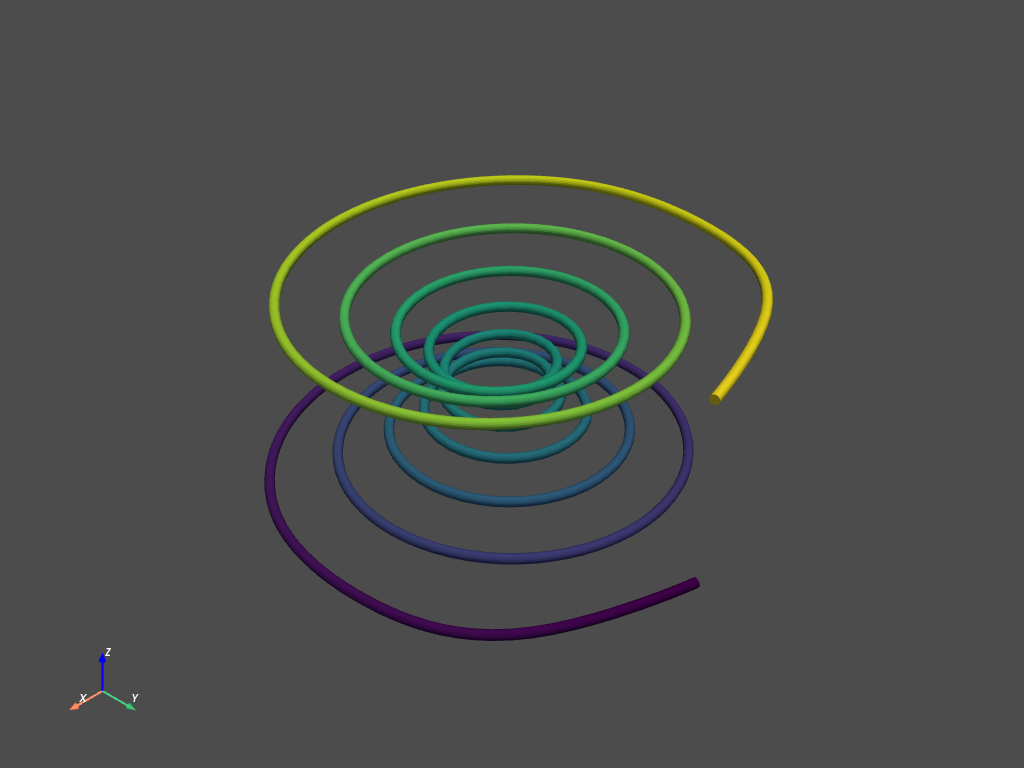

In [3]:
## Make a spline from points:
# Make the xyz points
theta = np.linspace(-10 * np.pi, 10 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
points = np.column_stack((x, y, z))

spline = pv.Spline(points, 500).tube(radius=0.1)
spline.plot(scalars='arc_length', show_scalar_bar=False)

In [2]:
# can now operate on the sphere and have it updated in the background
sphere.points *= 0.5

NameError: name 'sphere' is not defined

In [9]:
mp = pvqt.MultiPlotter(nrows=2, ncols=2)
mp[0, 0].add_mesh(pv.Sphere())
mp[0, 1].add_mesh(pv.Cylinder())
mp[1, 0].add_mesh(pv.Cube())
mp[1, 1].add_mesh(pv.Cone())



(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)000001D817A0A948

In [2]:
## Slider with Callback Function Example:

p = pvqt.BackgroundPlotter() # Use just like you would a pv.Plotter() instance

def on_slider_update_mesh(value):
    res = int(value)
    sphere = pv.Sphere(phi_resolution=res, theta_resolution=res)
    p.add_mesh(sphere, name='sphere', show_edges=True)
    return

p.add_slider_widget(on_slider_update_mesh, [5, 100], title='Resolution')
p.show()


In [4]:
# mesh points
vertices = np.array([[0, 0, 0],
                     [1, 0, 0],
                     [1, 1, 0],
                     [0, 1, 0],
                     [0.5, 0.5, -1]])

# mesh faces
faces = np.hstack([[4, 0, 1, 2, 3],  # square
                   [3, 0, 1, 4],     # triangle
                   [3, 1, 2, 4]])    # triangle

surf = pv.PolyData(vertices, faces)

# plot each face with a different color
# surf.plot(scalars=np.arange(3), cpos=[-1, 1, 0.5])
surf.plot(scalars=np.arange(3), cpos=[-1, 1])


InvalidCameraError: Invalid camera description
Camera description must be one of the following:

Iterable containing position, focal_point, and view up.  For example:
[(2.0, 5.0, 13.0), (0.0, 0.0, 0.0), (-0.7, -0.5, 0.3)]

Iterable containing a view vector.  For example:
[-1.0, 2.0, -5.0]

A string containing the plane orthogonal to the view direction.  For example:
'xy'


In [18]:
## Cylindrical Plotting Test:
## From https://notebook.community/nicoguaro/AdvancedMath/notebooks/vector_calculus-pyvista
red = (0.9, 0.1, 0.1)
blue = (0.2, 0.5, 0.7)
green = (0.3, 0.7, 0.3)

# Cylinder
phi, z = np.mgrid[0:2*np.pi:31j, -2:2*np.pi:31j]
x = 2*np.cos(phi)
y = 2*np.sin(phi)
cylinder = pv.StructuredGrid(x, y, z)

# Vertical plane
rho, z = np.mgrid[0:3:31j, -2:2*np.pi:31j]
x = rho*np.cos(np.pi/4)
y = rho*np.sin(np.pi/4)
vert_plane = pv.StructuredGrid(x, y, z)

# Horizontal plane
rho, phi = np.mgrid[0:3:31j, 0:2*np.pi:31j]
x = rho*np.cos(phi)
y = rho*np.sin(phi)
z = np.ones_like(x)
hor_plane = pv.StructuredGrid(x, y, z)

# view(geometries=[cylinder, vert_plane, hor_plane],
#      geometry_colors=[blue, red, green])

# scene = Scene([cylinder, vert_plane, hor_plane])

# cylinder.to_surface()

# cylinder.plot()

plotter = pv.Plotter(notebook=False) # Use just like you would a pv.Plotter() instance
plotter.add_mesh(cylinder, color=blue)
plotter.add_mesh(vert_plane, color=red)
plotter.add_mesh(hor_plane, color=green)


plotter.show()

In [33]:
cyl_geo = pv.Cylinder()
# Compute the normals in-place and use them to warp the globe
normals = cyl_geo.compute_normals(inplace=True)  # this activates the normals as well

centers = cyl_geo.cell_centers()
# Now use those normals to warp the surface
# warp = mesh.warp_by_scalar(factor=0.5e-5)


p = pv.Plotter(notebook=True) # Use just like you would a pv.Plotter() instance
p = pvqt.BackgroundPlotter()
p.add_mesh(cyl_geo, color="tan", show_edges=True, render_points_as_spheres=True)
p.add_mesh(centers, color="red", point_size=8.0, render_points_as_spheres=True)
p.add_mesh(cyl_geo.points, color="green", point_size=5.0, render_points_as_spheres=True)
# p.show(jupyter_backend='panel')
# p.show(jupyter_backend='pythreejs')
# p.show(jupyter_backend=None)
p.show()